In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
data['no_of_style_change'] = data['no_of_style_change'].astype(str)
data['team'] = data['team'].astype(str)

data = data.replace(['finishing '], ['finishing'])
data = data.replace(['sweing'], ['sewing'])
data['wip'].fillna(0 ,inplace=True)
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

data.loc[data['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
data.loc[data['no_of_workers'] == 89, 'no_of_workers'] = 35

data = data.drop(['date'], axis = 1)

categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   object 
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 131.0+ 

<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)>

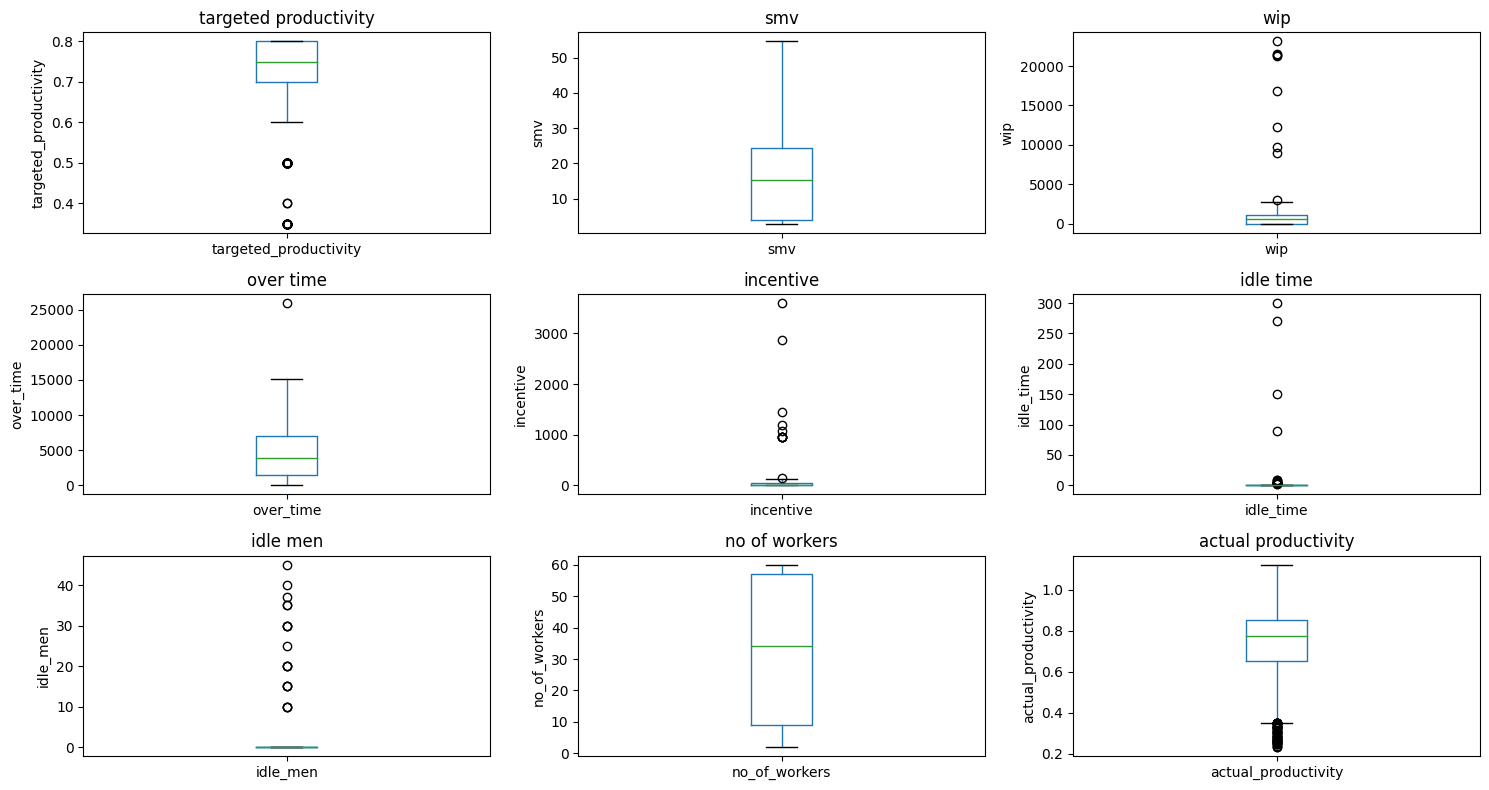

In [ ]:
def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots

In [ ]:
categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
new_data = data.copy()
for column in numerical:
    new_data = remove_outliers_iqr(new_data, column)

# Reset index
new_data = new_data.reset_index(drop=True)

# Display the dataset without outliers
new_data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Quarter2,sewing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57,0.650596
1011,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8,0.628333
1012,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8,0.625625
1013,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8,0.625625


<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)>

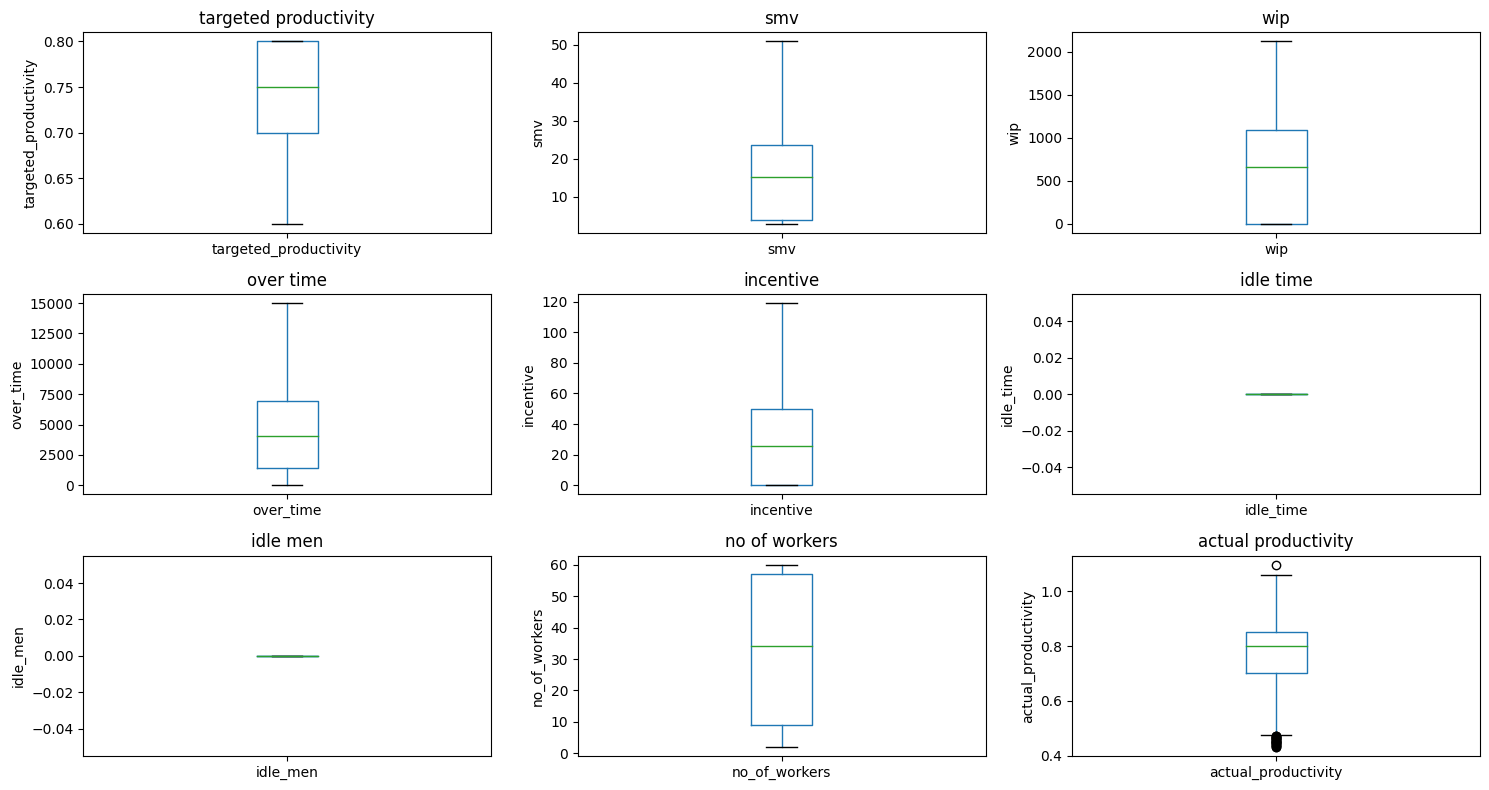

In [ ]:
def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  new_data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots

In [ ]:
!pip install smogn

In [ ]:
import smogn

In [ ]:
# garment_smogn = smogn.smoter(

#     data = data,  ## pandas dataframe
#     y = 'actual_productivity'  ## string ('header name')
# )

In [ ]:
garment_smogn = smogn.smoter(

    ## main arguments
    data = data,           ## pandas dataframe
    y = 'actual_productivity',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    pert = 0.04,
    replace = False,
    rel_method = 'auto'

    # ## phi relevance arguments
    # rel_thres = 0.5,         ## positive real number (0 < R < 1)
    # rel_method = 'manual',      ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both',   ## string ('low' or 'both' or 'high')
    # rel_coef = 1.5           ## positive real number (0 < R)
)

r_index: 100%|##########| 39/39 [00:00<00:00, 144.55it/s]


In [ ]:
garment_smogn

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.800000,26.160000,1108.000000,7080.0,98.0,0.000000,0.0,0,59.0,0.940725
6,Quarter1,finishing,Thursday,2,0.750000,3.940000,0.000000,960.0,0.0,0.000000,0.0,0,8.0,0.755167
8,Quarter1,sewing,Thursday,2,0.750000,19.870000,733.000000,6000.0,34.0,0.000000,0.0,0,55.0,0.753098
11,Quarter1,sewing,Thursday,10,0.750000,19.310000,578.000000,6480.0,45.0,0.000000,0.0,0,54.0,0.712205
16,Quarter1,finishing,Thursday,7,0.800000,2.900000,0.000000,960.0,0.0,0.000000,0.0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Quarter2,sewing,Thursday,5,0.500083,3.568712,23.267948,847.0,1.0,0.950868,0.0,0,8.0,0.262629
407,Quarter2,sewing,Thursday,5,0.793564,48.381538,1420.074231,10480.0,27.0,1.471020,0.0,0,57.0,0.404831
408,Quarter2,sewing,Thursday,5,0.699105,2.751991,0.000000,3546.0,0.0,0.000000,0.0,0,7.0,0.464895
409,Quarter2,sewing,Thursday,5,0.749548,2.753074,0.000000,1062.0,0.0,0.548625,0.0,0,7.0,0.404172


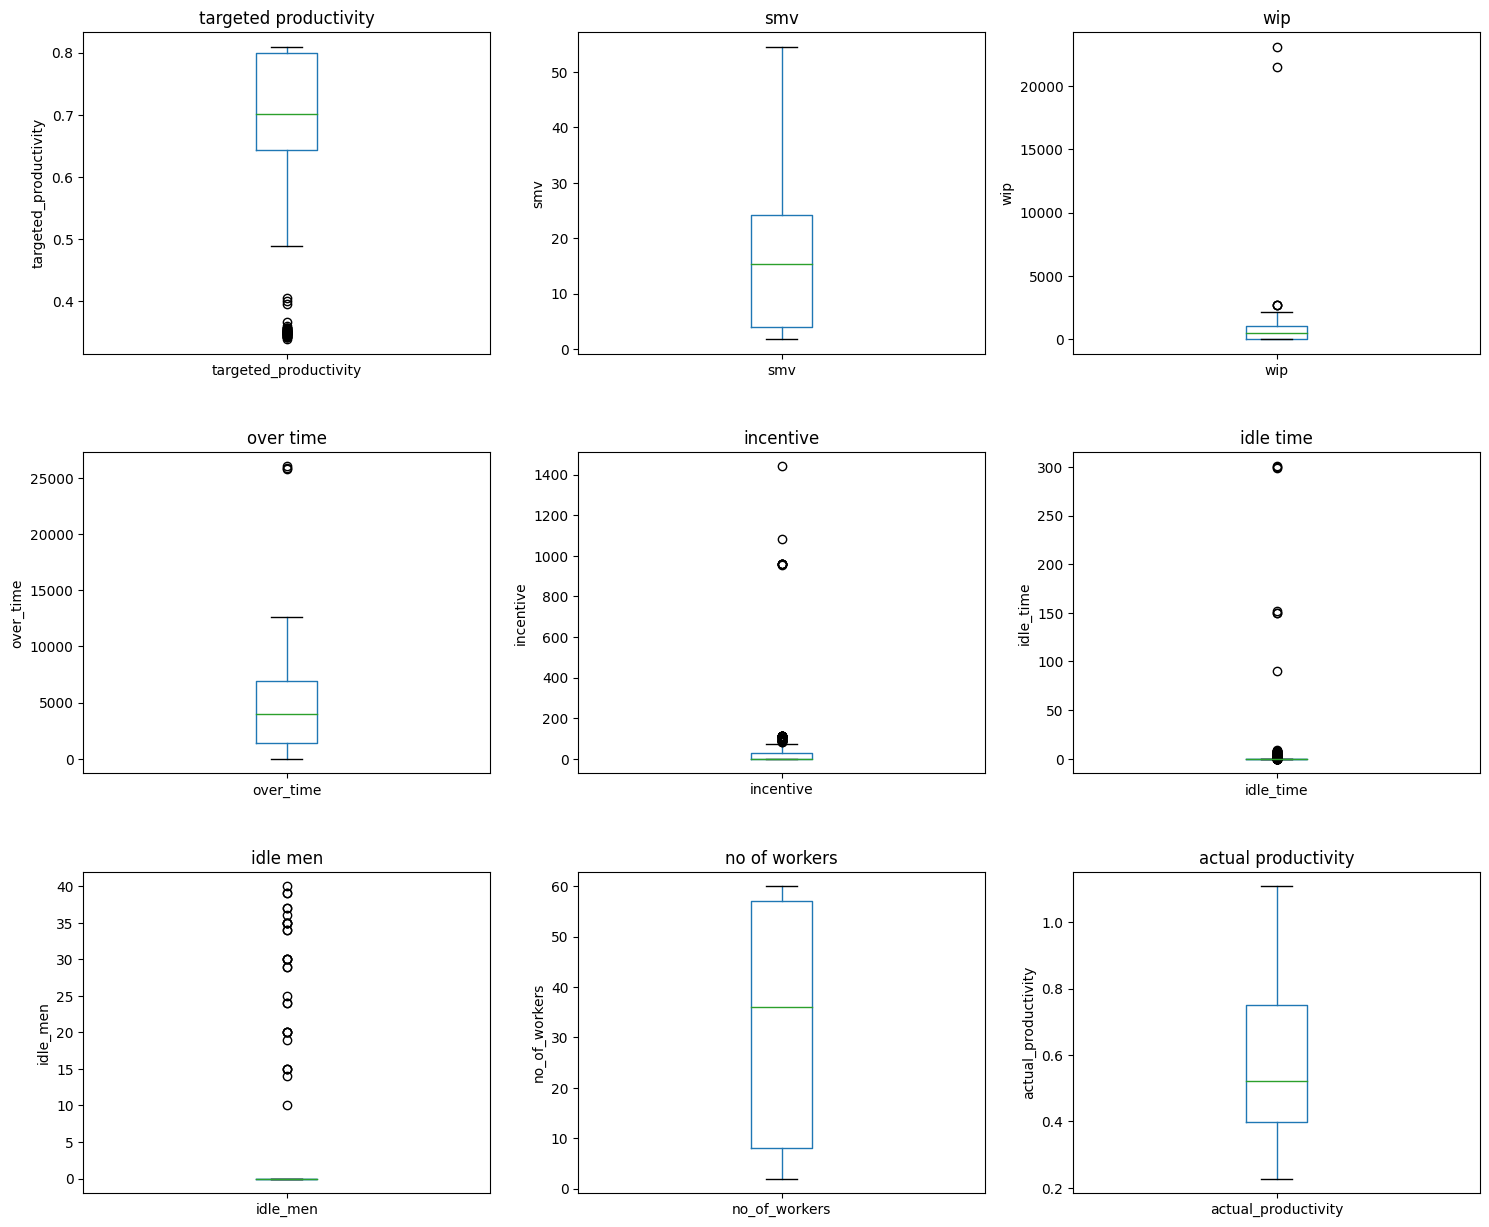

In [ ]:
# categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment_smogn.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
garment_smogn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 410
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1010 non-null   object 
 1   department             1010 non-null   object 
 2   day                    1010 non-null   object 
 3   team                   1010 non-null   object 
 4   targeted_productivity  1010 non-null   float64
 5   smv                    1010 non-null   float64
 6   wip                    1010 non-null   float64
 7   over_time              1010 non-null   float64
 8   incentive              1010 non-null   float64
 9   idle_time              1010 non-null   float64
 10  idle_men               1010 non-null   float64
 11  no_of_style_change     1010 non-null   object 
 12  no_of_workers          1010 non-null   float64
 13  actual_productivity    1010 non-null   float64
dtypes: float64(9), object(5)
memory usage: 118.4+ KB


In [ ]:
garment_smogn.duplicated().sum()

0

In [ ]:
garment_smogn['wip'] = garment_smogn['wip'].apply(lambda x: int(x))
garment_smogn['no_of_workers'] = garment_smogn['no_of_workers'].apply(lambda x: int(x))
garment_smogn['idle_time'] = garment_smogn['idle_time'].apply(lambda x: int(x))
garment_smogn['idle_men'] = garment_smogn['idle_men'].apply(lambda x: int(x))
data['idle_time'] = data['idle_time'].apply(lambda x: int(x))
garment_smogn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 410
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1010 non-null   object 
 1   department             1010 non-null   object 
 2   day                    1010 non-null   object 
 3   team                   1010 non-null   object 
 4   targeted_productivity  1010 non-null   float64
 5   smv                    1010 non-null   float64
 6   wip                    1010 non-null   int64  
 7   over_time              1010 non-null   float64
 8   incentive              1010 non-null   float64
 9   idle_time              1010 non-null   int64  
 10  idle_men               1010 non-null   int64  
 11  no_of_style_change     1010 non-null   object 
 12  no_of_workers          1010 non-null   int64  
 13  actual_productivity    1010 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 118.4+ KB


In [ ]:
# # categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
# numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

# # Function to detect and remove outliers using IQR
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered

# # Iterate over numerical columns and remove outliers
# new_gamrent_smogn = garment_smogn.copy()
# for column in numerical:
#     garment_smogn = remove_outliers_iqr(new_data, column)

# # Reset index
# new_gamrent_smogn = new_gamrent_smogn.reset_index(drop=True)

# # Display the dataset without outliers
# new_gamrent_smogn

In [ ]:
garment_smogn

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.800000,26.160000,1108,7080.0,98.0,0,0,0,59,0.940725
6,Quarter1,finishing,Thursday,2,0.750000,3.940000,0,960.0,0.0,0,0,0,8,0.755167
8,Quarter1,sewing,Thursday,2,0.750000,19.870000,733,6000.0,34.0,0,0,0,55,0.753098
11,Quarter1,sewing,Thursday,10,0.750000,19.310000,578,6480.0,45.0,0,0,0,54,0.712205
16,Quarter1,finishing,Thursday,7,0.800000,2.900000,0,960.0,0.0,0,0,0,8,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Quarter2,sewing,Thursday,5,0.500083,3.568712,23,847.0,1.0,0,0,0,8,0.262629
407,Quarter2,sewing,Thursday,5,0.793564,48.381538,1420,10480.0,27.0,1,0,0,57,0.404831
408,Quarter2,sewing,Thursday,5,0.699105,2.751991,0,3546.0,0.0,0,0,0,7,0.464895
409,Quarter2,sewing,Thursday,5,0.749548,2.753074,0,1062.0,0.0,0,0,0,7,0.404172


In [ ]:
new_dataset = pd.concat([new_data, garment_smogn], axis=0, ignore_index=True)

new_dataset.shape

(2025, 14)

In [ ]:
new_dataset.duplicated().sum()

450

In [ ]:
new_dataset.duplicated().sum()
new_dataset = new_dataset.drop_duplicates(keep='first')
new_dataset = new_dataset.reset_index(drop=True)
new_dataset

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.800000,26.160000,1108.0,7080.0,98.0,0.0,0,0,59,0.940725
1,Quarter1,finishing,Thursday,1,0.750000,3.940000,0.0,960.0,0.0,0.0,0,0,8,0.886500
2,Quarter1,sewing,Thursday,11,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,12,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
4,Quarter1,sewing,Thursday,6,0.800000,25.900000,1170.0,1920.0,50.0,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,Quarter2,sewing,Thursday,5,0.500083,3.568712,23.0,847.0,1.0,0.0,0,0,8,0.262629
1571,Quarter2,sewing,Thursday,5,0.793564,48.381538,1420.0,10480.0,27.0,1.0,0,0,57,0.404831
1572,Quarter2,sewing,Thursday,5,0.699105,2.751991,0.0,3546.0,0.0,0.0,0,0,7,0.464895
1573,Quarter2,sewing,Thursday,5,0.749548,2.753074,0.0,1062.0,0.0,0.0,0,0,7,0.404172


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1575 non-null   object 
 1   department             1575 non-null   object 
 2   day                    1575 non-null   object 
 3   team                   1575 non-null   object 
 4   targeted_productivity  1575 non-null   float64
 5   smv                    1575 non-null   float64
 6   wip                    1575 non-null   float64
 7   over_time              1575 non-null   float64
 8   incentive              1575 non-null   float64
 9   idle_time              1575 non-null   float64
 10  idle_men               1575 non-null   int64  
 11  no_of_style_change     1575 non-null   object 
 12  no_of_workers          1575 non-null   int64  
 13  actual_productivity    1575 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 172.4+ 

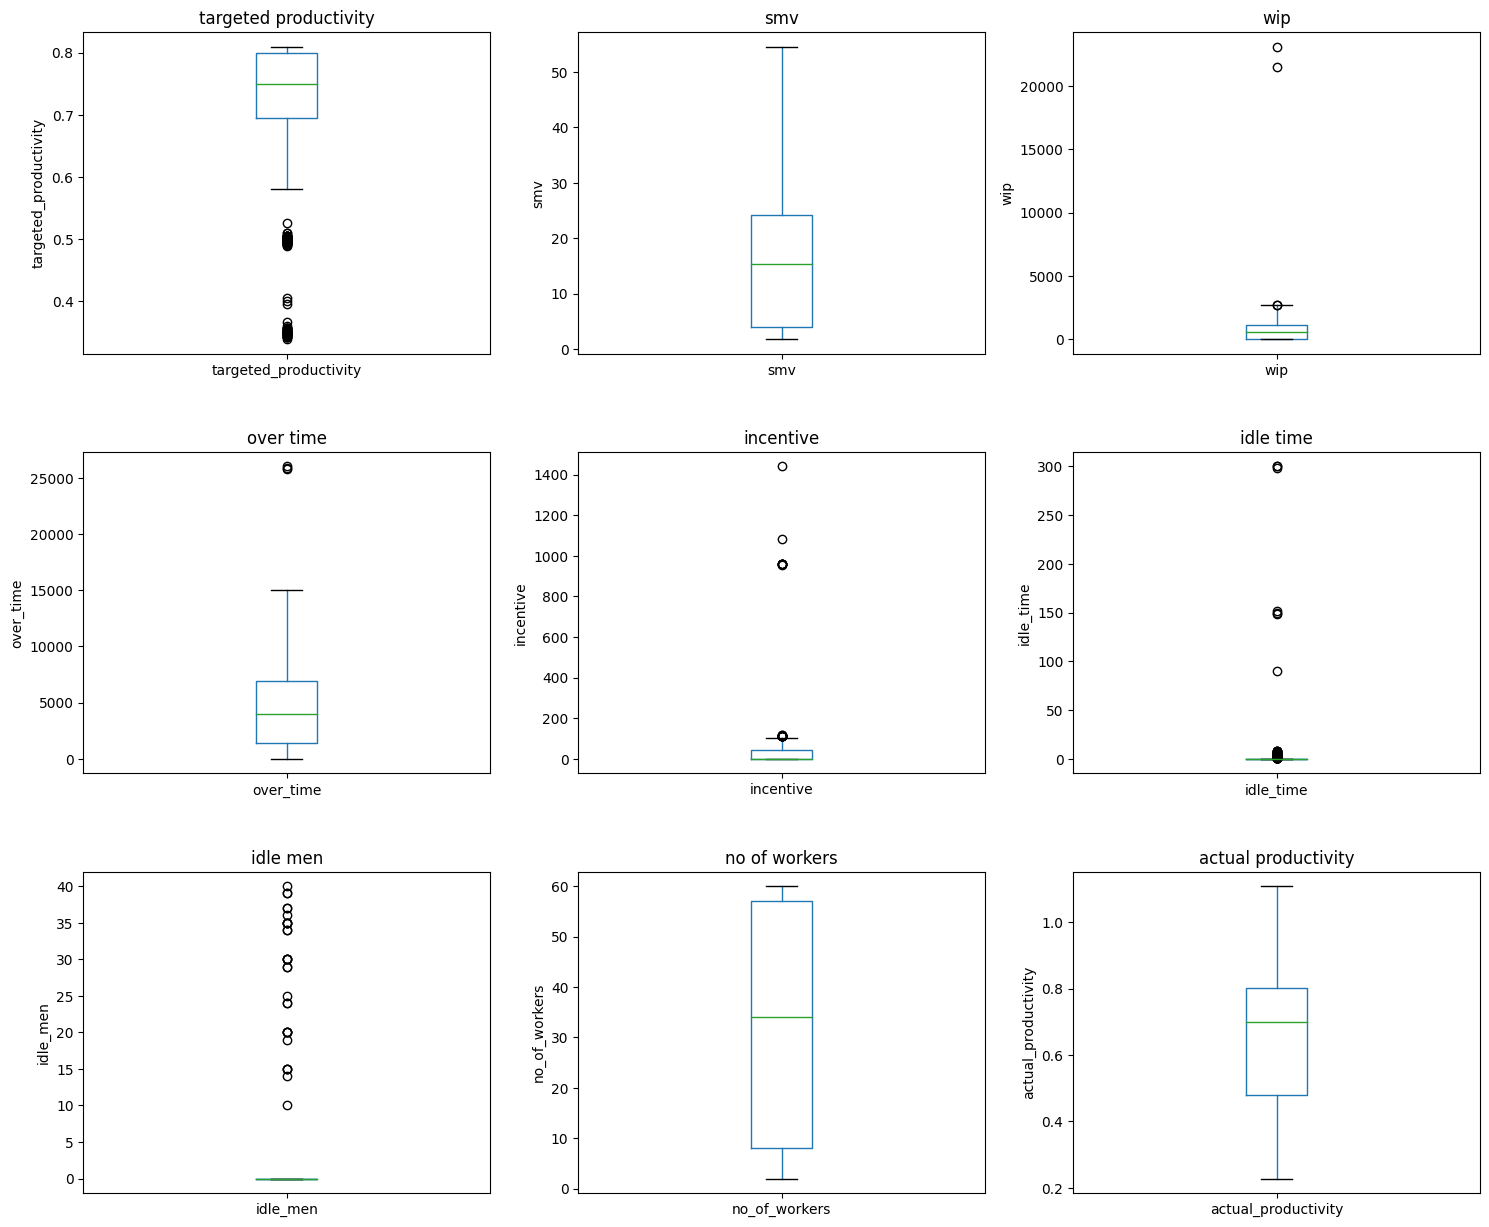

In [ ]:
# categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  new_dataset.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
# new_dataset = new_dataset.drop(['idle_men', 'idle_time'], axis = 1)

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1575 non-null   object 
 1   department             1575 non-null   object 
 2   day                    1575 non-null   object 
 3   team                   1575 non-null   object 
 4   targeted_productivity  1575 non-null   float64
 5   smv                    1575 non-null   float64
 6   wip                    1575 non-null   float64
 7   over_time              1575 non-null   float64
 8   incentive              1575 non-null   float64
 9   idle_time              1575 non-null   float64
 10  idle_men               1575 non-null   int64  
 11  no_of_style_change     1575 non-null   object 
 12  no_of_workers          1575 non-null   int64  
 13  actual_productivity    1575 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 172.4+ 

In [ ]:
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
without_out = new_dataset.copy()
for column in numerical:
    without_out = remove_outliers_iqr(without_out, column)

# Reset index
without_out = without_out.reset_index(drop=True)

# Display the dataset without outliers
without_out

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.800000,26.160000,1108.0,7080.0,98.0,0.0,0,0,59,0.940725
1,Quarter1,finishing,Thursday,1,0.750000,3.940000,0.0,960.0,0.0,0.0,0,0,8,0.886500
2,Quarter1,sewing,Thursday,11,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,12,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
4,Quarter1,sewing,Thursday,6,0.800000,25.900000,1170.0,1920.0,50.0,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,Quarter2,sewing,Thursday,5,0.759696,19.763279,62.0,3965.0,0.0,0.0,0,0,33,0.336926
1288,Quarter2,sewing,Thursday,5,0.795526,3.884070,0.0,1167.0,0.0,0.0,0,0,7,0.335530
1289,Quarter2,sewing,Thursday,5,0.699105,2.751991,0.0,3546.0,0.0,0.0,0,0,7,0.464895
1290,Quarter2,sewing,Thursday,5,0.749548,2.753074,0.0,1062.0,0.0,0.0,0,0,7,0.404172


In [ ]:
without_out['quarter'].value_counts()

,count
quarter,
Quarter2,517
Quarter1,326
Quarter4,225
Quarter3,186
Quarter5,38


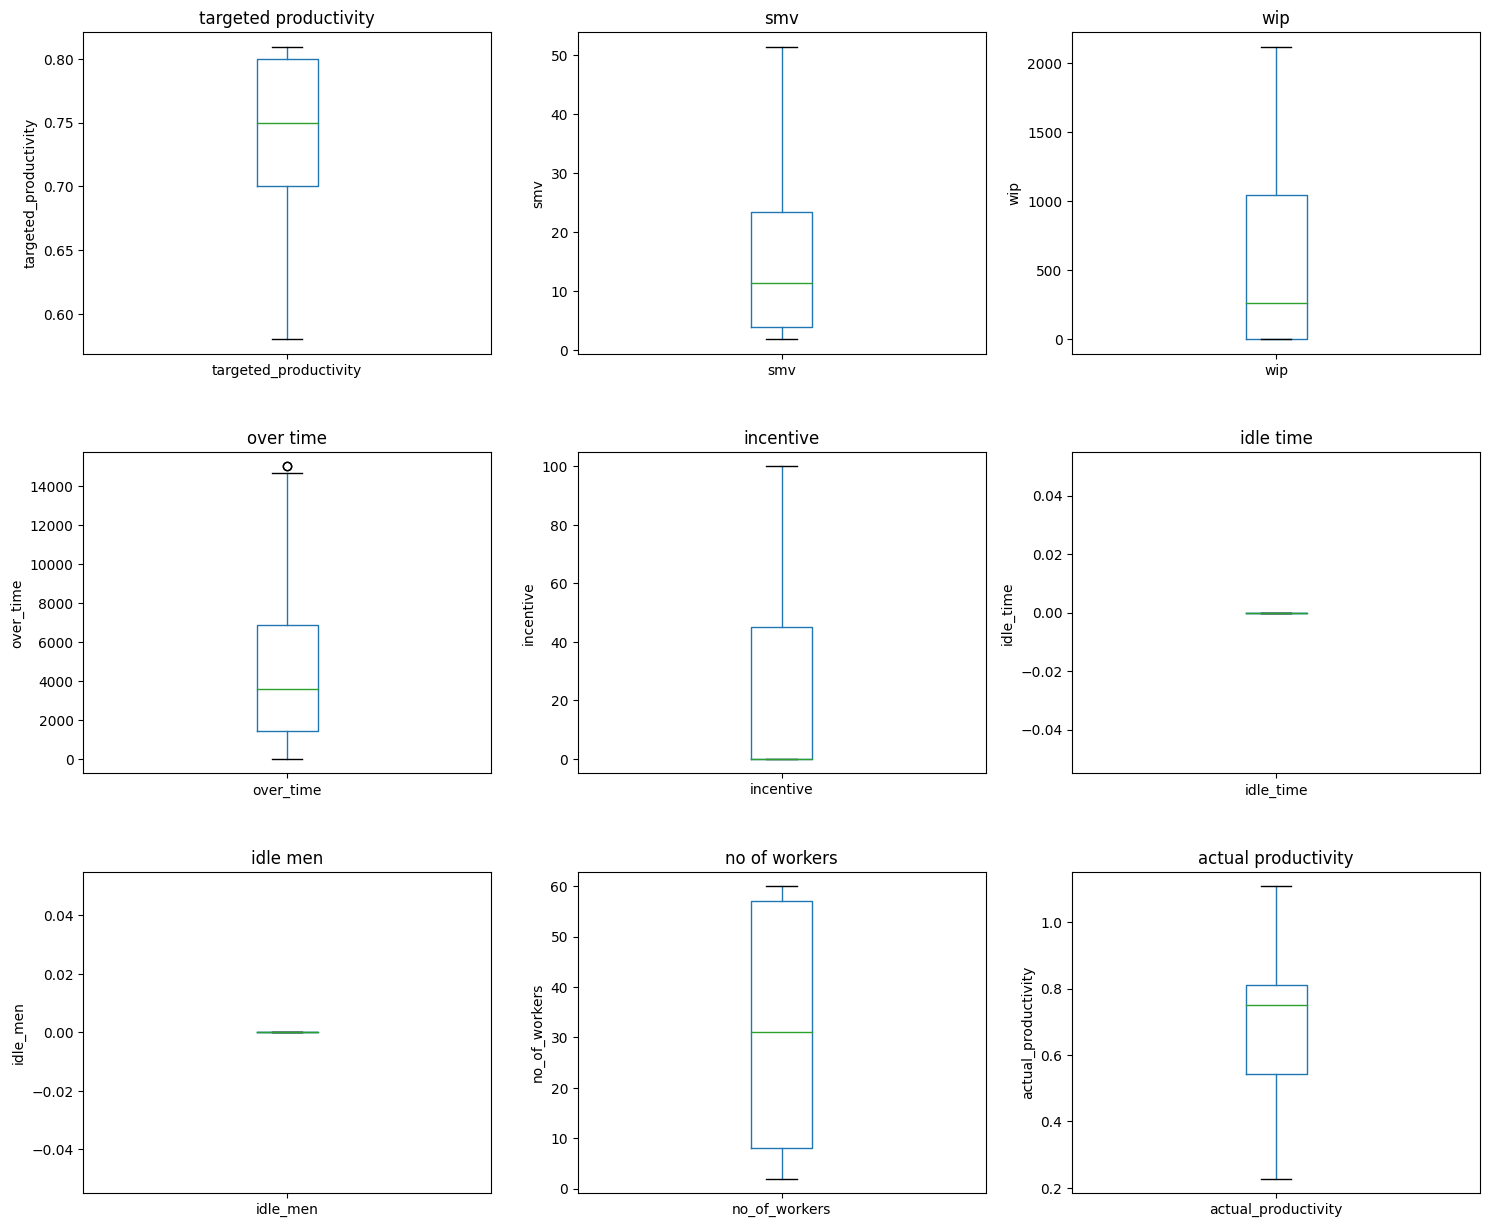

In [ ]:
# categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  without_out.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
# prompt: save this dataset at the location as csv file

from google.colab import drive
drive.mount('/content/drive')
without_out.to_csv('/content/drive/MyDrive/Final Year Research/data/new_smoter_garments_worker_productivity_for_nn.csv', index=False)  # Replace 'your_file.csv' with your desired filename


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
